In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score, davies_bouldin_score



In [2]:

# Función para procesar un dataset y calcular métricas
def process_dataset(data, dataset_name="Dataset"):
    global results
    scaler = StandardScaler()
    data_scaled = scaler.fit_transform(data)
    
    for n_components in reductions:
        print(f"Reducción (PCA) = {n_components}")
        pca = PCA(n_components=n_components)
        data_pca = pca.fit_transform(data_scaled)
        
        for eps in eps_values:
            print(f"épsilon = {eps}")
            for min_samples in min_samples_values:
                print(f"min_samples = {min_samples}")
                dbscan = DBSCAN(eps=eps, min_samples=min_samples)
                clusters = dbscan.fit_predict(data_pca)
                
                # Obtener el número de clusters encontrados (ignorando -1 que son anomalías)
                unique_clusters = set(clusters)
                num_clusters = len(unique_clusters) - (1 if -1 in unique_clusters else 0)
                
                # Calcular métricas si hay más de un cluster
                silhouette = None
                davies_bouldin = None
                
                if num_clusters >= 2:
                    try:
                        silhouette = silhouette_score(data_pca, clusters)
                        davies_bouldin = davies_bouldin_score(data_pca, clusters)
                    except ValueError:
                        pass  # Si no es posible calcular las métricas, ignorar
                    
                # Calcular estadísticas sobre anomalías
                num_anomalies = np.sum(clusters == -1)  # -1 indica anomalías
                percent_anomalies = (num_anomalies / len(clusters)) * 100 if len(clusters) > 0 else 0
                
                # Guardar resultados
                results.append({
                    "Dataset": dataset_name,
                    "Reducción (PCA)": n_components,
                    "eps": eps,
                    "min_samples": min_samples,
                    "Número de Clusters": num_clusters,
                    "Anomalías Detectadas": num_anomalies,
                    "Porcentaje de Anomalías": percent_anomalies,
                    "Coeficiente de Silueta": silhouette,
                    "Índice Davies-Bouldin": davies_bouldin
                })


In [3]:

# Configuración de parámetros
reductions = [2, 3, 5, 10, 50, 100]  # Número de componentes principales
eps_values = [1, 3, 5, 10]  # Valores de epsilon para DBSCAN
min_samples_values = [3, 5, 10, 20]  # Valores de min_samples para DBSCAN

# DataFrame para almacenar resultados
results = []



In [4]:

# Cargar el dataset
data = pd.read_csv('perfcounters_normal_running.csv', header=None)
data = data.drop(columns=[data.columns[0]])

# Procesar el dataset
dataset_name = "Dataset"
process_dataset(data, dataset_name)

# Convertir resultados a DataFrame
results_df = pd.DataFrame(results)


Reducción (PCA) = 2
épsilon = 1
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 3
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 5
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 10
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
Reducción (PCA) = 3
épsilon = 1
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 3
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 5
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 10
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
Reducción (PCA) = 5
épsilon = 1
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 3
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 5
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
épsilon = 10
min_samples = 3
min_samples = 5
min_samples = 10
min_samples = 20
R

In [5]:


# Mostrar resultados en tablas
print("Resultados de la detección de anomalías:")
print(results_df)

# Guardar resultados en un archivo CSV (opcional)
results_df.to_csv("resultados_dbscan.csv", index=False)

Resultados de la detección de anomalías:
    Dataset  Reducción (PCA)  eps  min_samples  Número de Clusters  \
0   Dataset                2    1            3                  24   
1   Dataset                2    1            5                  18   
2   Dataset                2    1           10                  15   
3   Dataset                2    1           20                  17   
4   Dataset                2    3            3                  13   
..      ...              ...  ...          ...                 ...   
91  Dataset              100    5           20                  53   
92  Dataset              100   10            3                  38   
93  Dataset              100   10            5                  27   
94  Dataset              100   10           10                  20   
95  Dataset              100   10           20                  19   

    Anomalías Detectadas  Porcentaje de Anomalías  Coeficiente de Silueta  \
0                     87                 

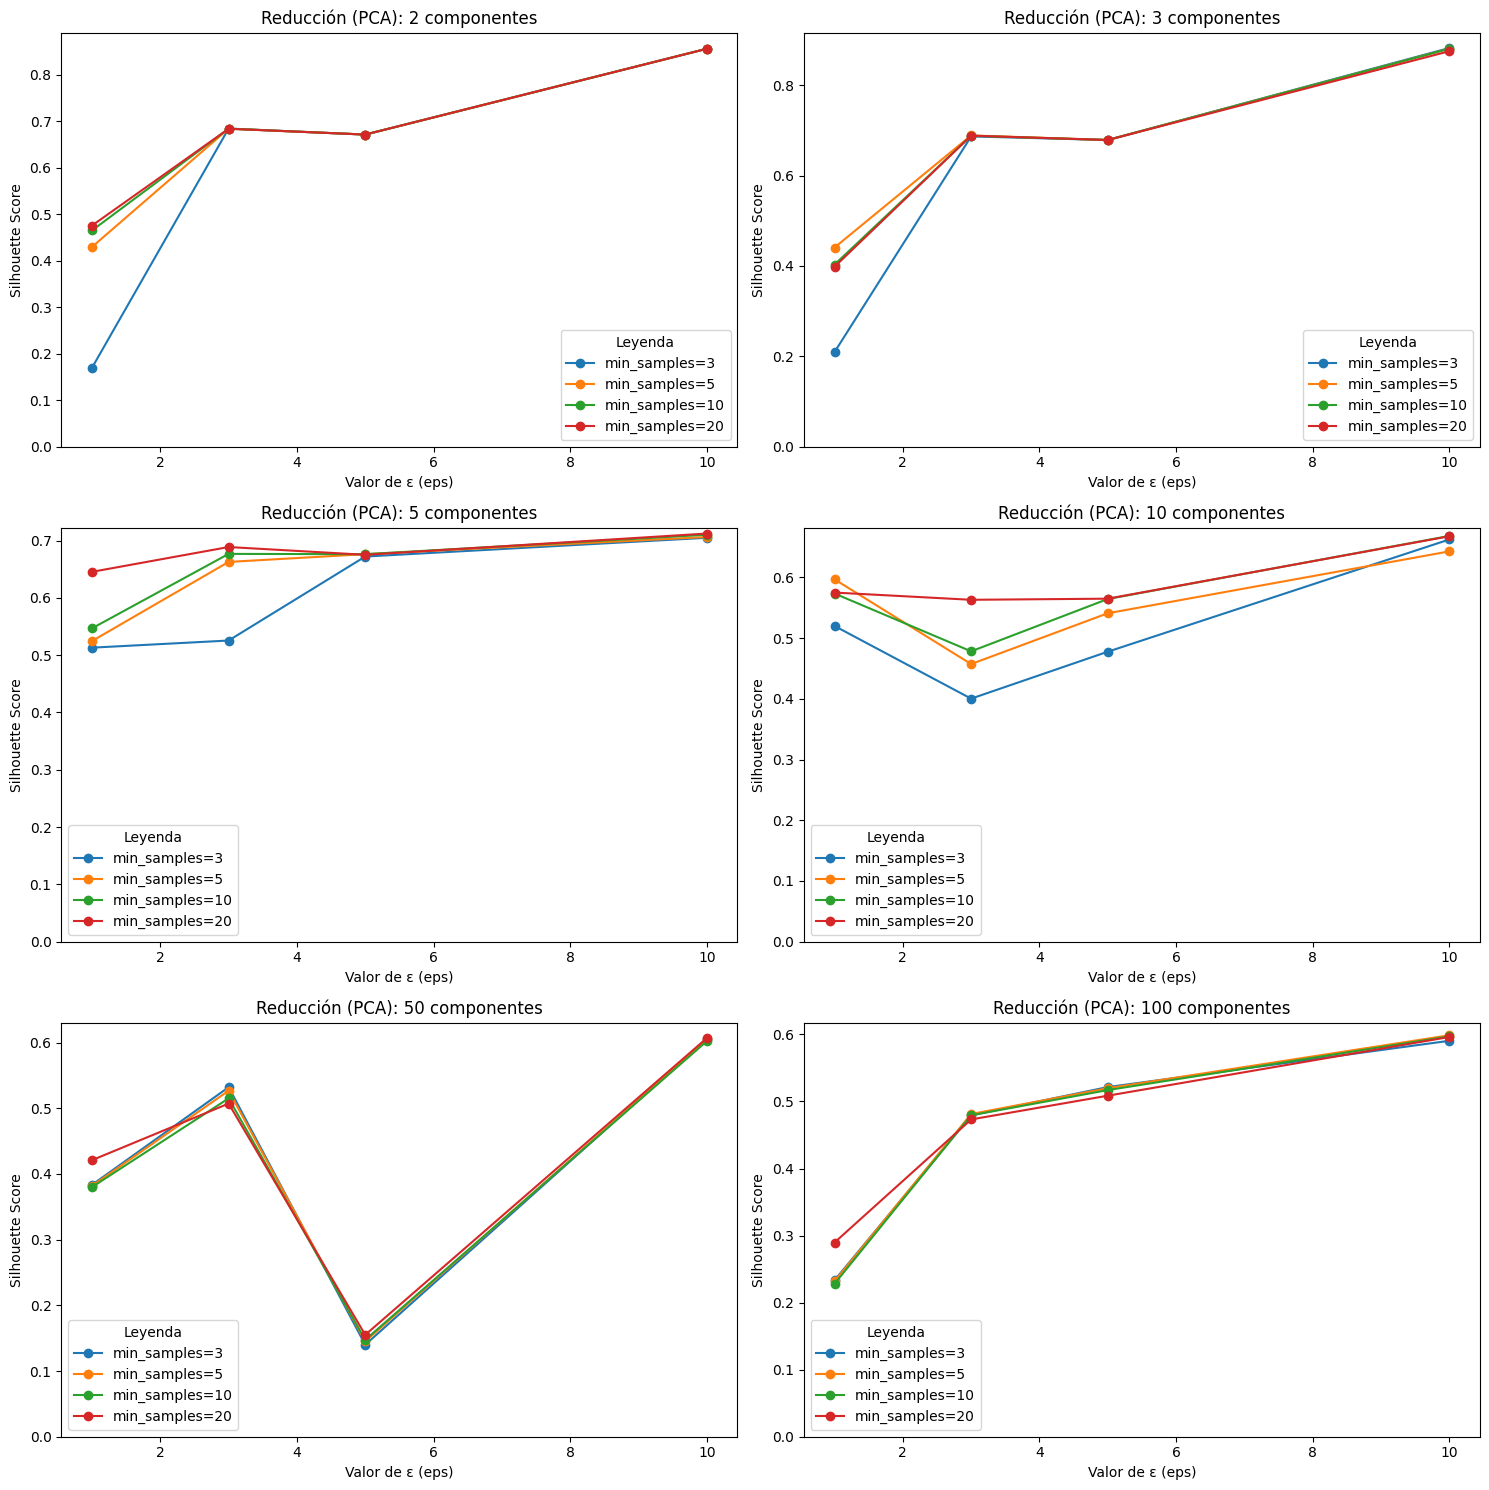

In [10]:

# Filtrar solo las filas donde se calcularon métricas válidas (silhouette_score no es None)
results_df = results_df.dropna(subset=['Coeficiente de Silueta'])

# Obtener los valores únicos de 'Reducción (PCA)'
pca_reductions = results_df['Reducción (PCA)'].unique()

# Configurar la figura con subplots
num_plots = len(pca_reductions)
num_cols = 2  # Dos columnas por fila
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Iterar sobre cada valor de 'Reducción (PCA)'
for i, reduction in enumerate(pca_reductions):
    ax = axes[i]  # Seleccionar el subplot correspondiente
    
    # Filtrar los datos para el valor actual de 'Reducción (PCA)'
    filtered_data = results_df[results_df['Reducción (PCA)'] == reduction]
    
    # Agrupar por 'eps' y 'min_samples' y calcular el promedio del silhouette score
    grouped_data = filtered_data.groupby(['eps', 'min_samples'])['Coeficiente de Silueta'].mean().reset_index()
    
    # Crear un gráfico para cada valor de 'min_samples'
    for min_samples, group in grouped_data.groupby('min_samples'):
        ax.plot(group['eps'], group['Coeficiente de Silueta'], marker='o', label=f'min_samples={min_samples}')
    
    # Configurar título y etiquetas
    ax.set_title(f'Reducción (PCA): {reduction} componentes')
    ax.set_xlabel('Valor de ε (eps)')
    ax.set_ylabel('Silhouette Score')
    ax.legend(title='Leyenda', loc='best')  # Agregar leyenda
    
    # Ajustar límites del eje y si es necesario
    ax.set_ylim(bottom=0)  # Asegurarse de que el eje y comience en 0

# Ocultar subplots vacíos si hay menos subplots que el número máximo posible
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.savefig(f"dbscan_Silhouette.png")
plt.show()

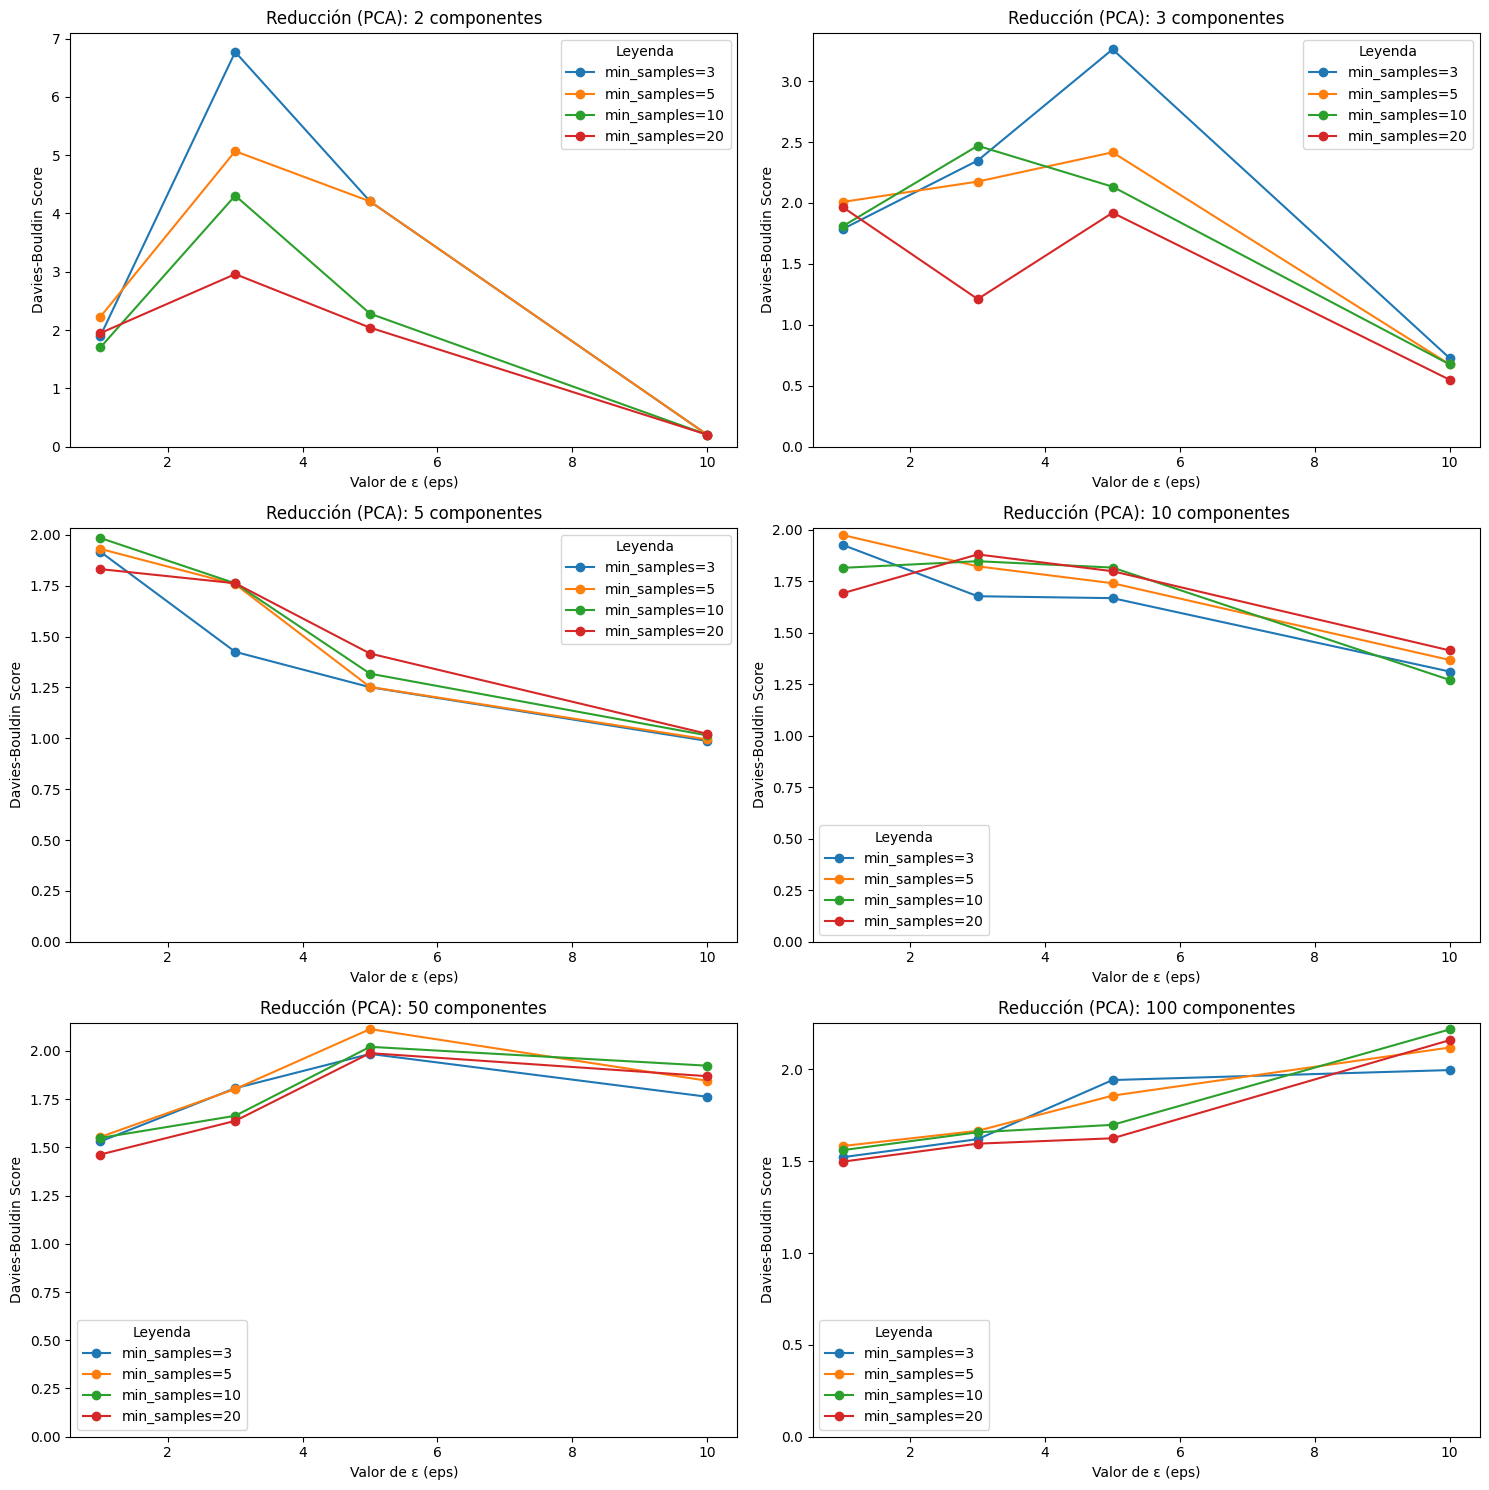

In [11]:

# Filtrar solo las filas donde se calcularon métricas válidas (Davies-Bouldin score no es None)
results_df = results_df.dropna(subset=['Índice Davies-Bouldin'])

# Obtener los valores únicos de 'Reducción (PCA)'
pca_reductions = results_df['Reducción (PCA)'].unique()

# Configurar la figura con subplots
num_plots = len(pca_reductions)
num_cols = 2  # Dos columnas por fila
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Iterar sobre cada valor de 'Reducción (PCA)'
for i, reduction in enumerate(pca_reductions):
    ax = axes[i]  # Seleccionar el subplot correspondiente
    
    # Filtrar los datos para el valor actual de 'Reducción (PCA)'
    filtered_data = results_df[results_df['Reducción (PCA)'] == reduction]
    
    # Agrupar por 'eps' y 'min_samples' y calcular el promedio del Davies-Bouldin score
    grouped_data = filtered_data.groupby(['eps', 'min_samples'])['Índice Davies-Bouldin'].mean().reset_index()
    
    # Crear un gráfico para cada valor de 'min_samples'
    for min_samples, group in grouped_data.groupby('min_samples'):
        ax.plot(group['eps'], group['Índice Davies-Bouldin'], marker='o', label=f'min_samples={min_samples}')
    
    # Configurar título y etiquetas
    ax.set_title(f'Reducción (PCA): {reduction} componentes')
    ax.set_xlabel('Valor de ε (eps)')
    ax.set_ylabel('Davies-Bouldin Score')
    ax.legend(title='Leyenda', loc='best')  # Agregar leyenda
    
    # Ajustar límites del eje y si es necesario
    ax.set_ylim(bottom=0)  # Asegurarse de que el eje y comience en 0

# Ocultar subplots vacíos si hay menos subplots que el número máximo posible
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.savefig(f"dbscan_Davies-Bouldin.png")
plt.show()

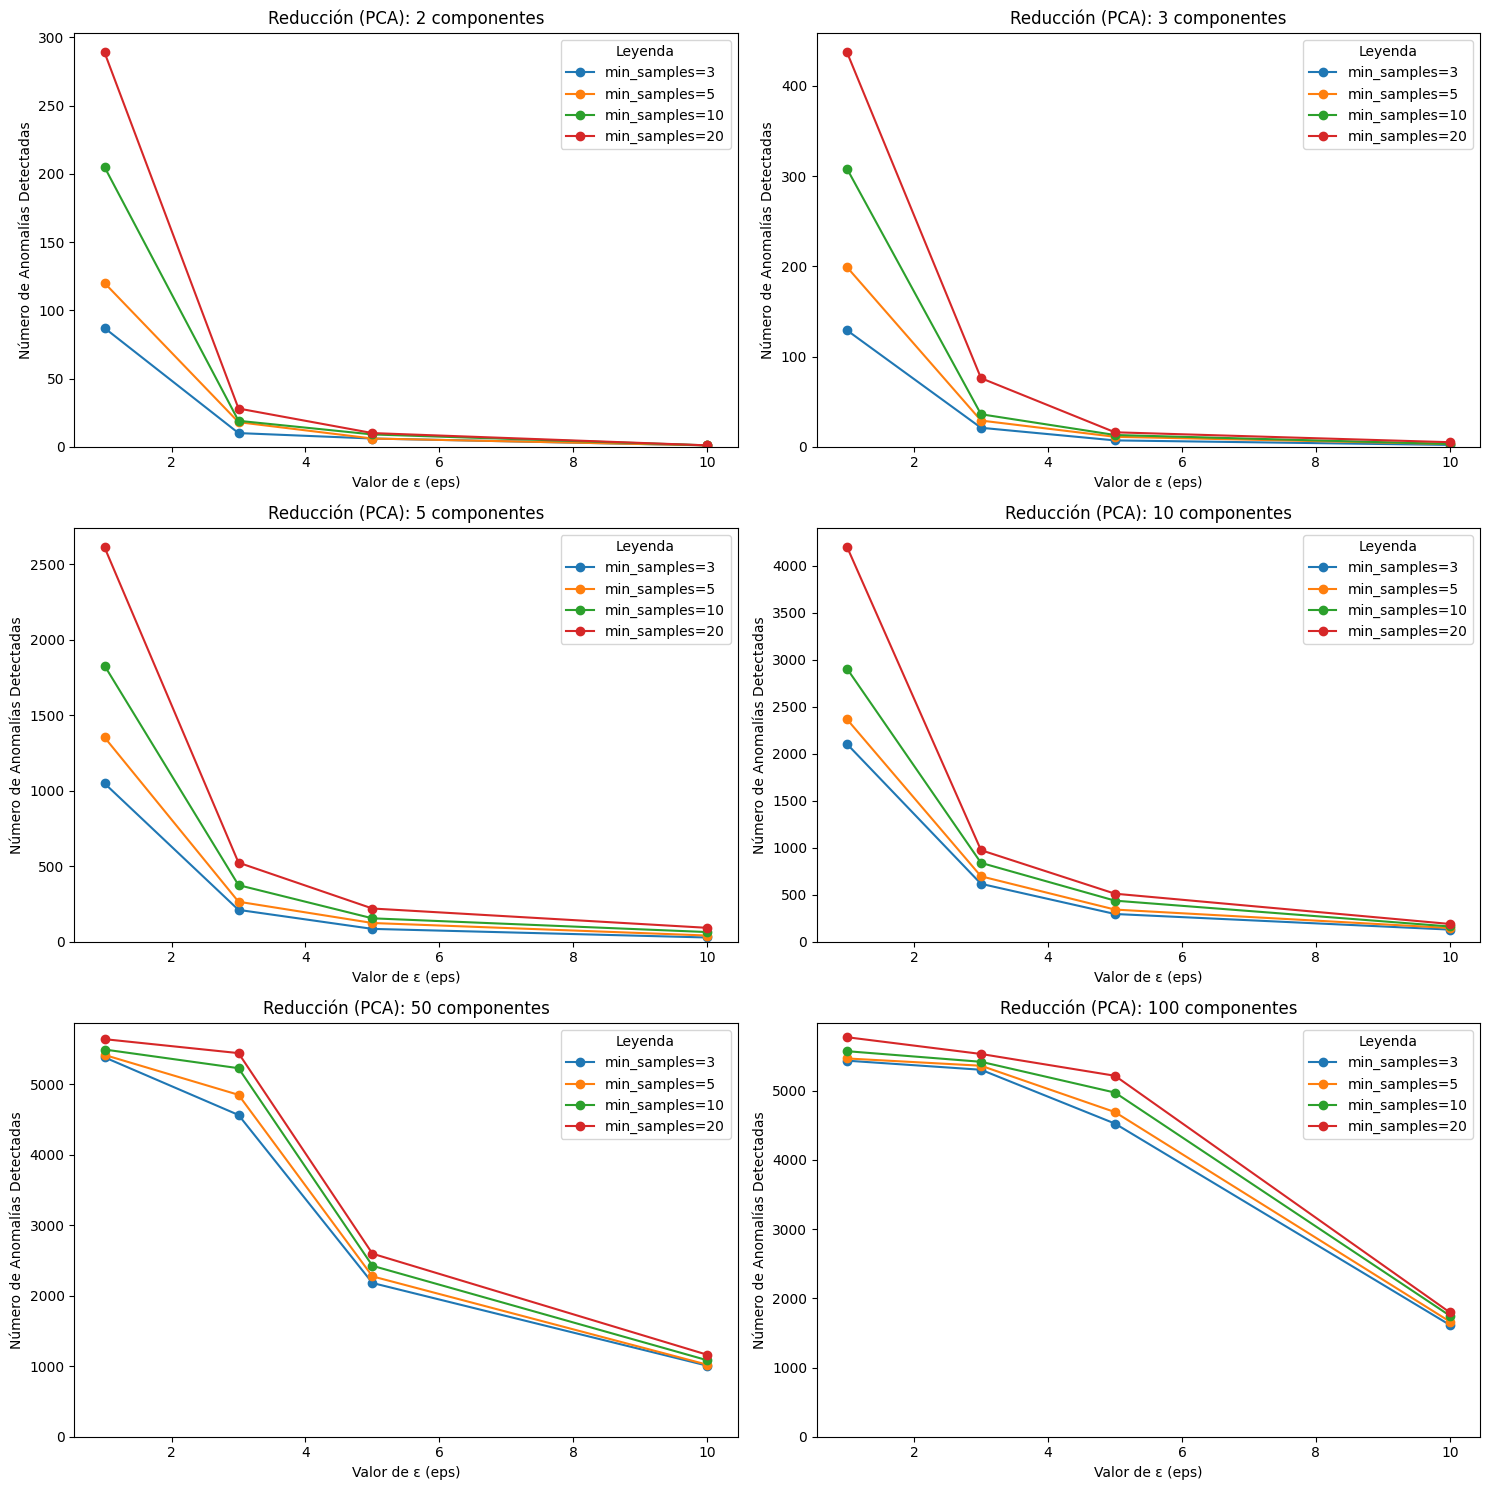

In [12]:

# Asegúrate de que results_df esté definido y contenga los resultados calculados previamente

# Obtener los valores únicos de 'Reducción (PCA)'
pca_reductions = results_df['Reducción (PCA)'].unique()

# Configurar la figura con subplots
num_plots = len(pca_reductions)
num_cols = 2  # Dos columnas por fila
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Iterar sobre cada valor de 'Reducción (PCA)'
for i, reduction in enumerate(pca_reductions):
    ax = axes[i]  # Seleccionar el subplot correspondiente
    
    # Filtrar los datos para el valor actual de 'Reducción (PCA)'
    filtered_data = results_df[results_df['Reducción (PCA)'] == reduction]
    
    # Agrupar por 'eps' y 'min_samples' y calcular el número de anomalías detectadas
    grouped_data = filtered_data.groupby(['eps', 'min_samples'])['Anomalías Detectadas'].sum().reset_index()
    
    # Crear un gráfico para cada valor de 'min_samples'
    for min_samples, group in grouped_data.groupby('min_samples'):
        ax.plot(group['eps'], group['Anomalías Detectadas'], marker='o', label=f'min_samples={min_samples}')
    
    # Configurar título y etiquetas
    ax.set_title(f'Reducción (PCA): {reduction} componentes')
    ax.set_xlabel('Valor de ε (eps)')
    ax.set_ylabel('Número de Anomalías Detectadas')
    ax.legend(title='Leyenda', loc='best')  # Agregar leyenda
    
    # Ajustar límites del eje y si es necesario
    ax.set_ylim(bottom=0)  # Asegurarse de que el eje y comience en 0

# Ocultar subplots vacíos si hay menos subplots que el número máximo posible
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.savefig(f"dbscan_Num-Anomalias.png")
plt.show()

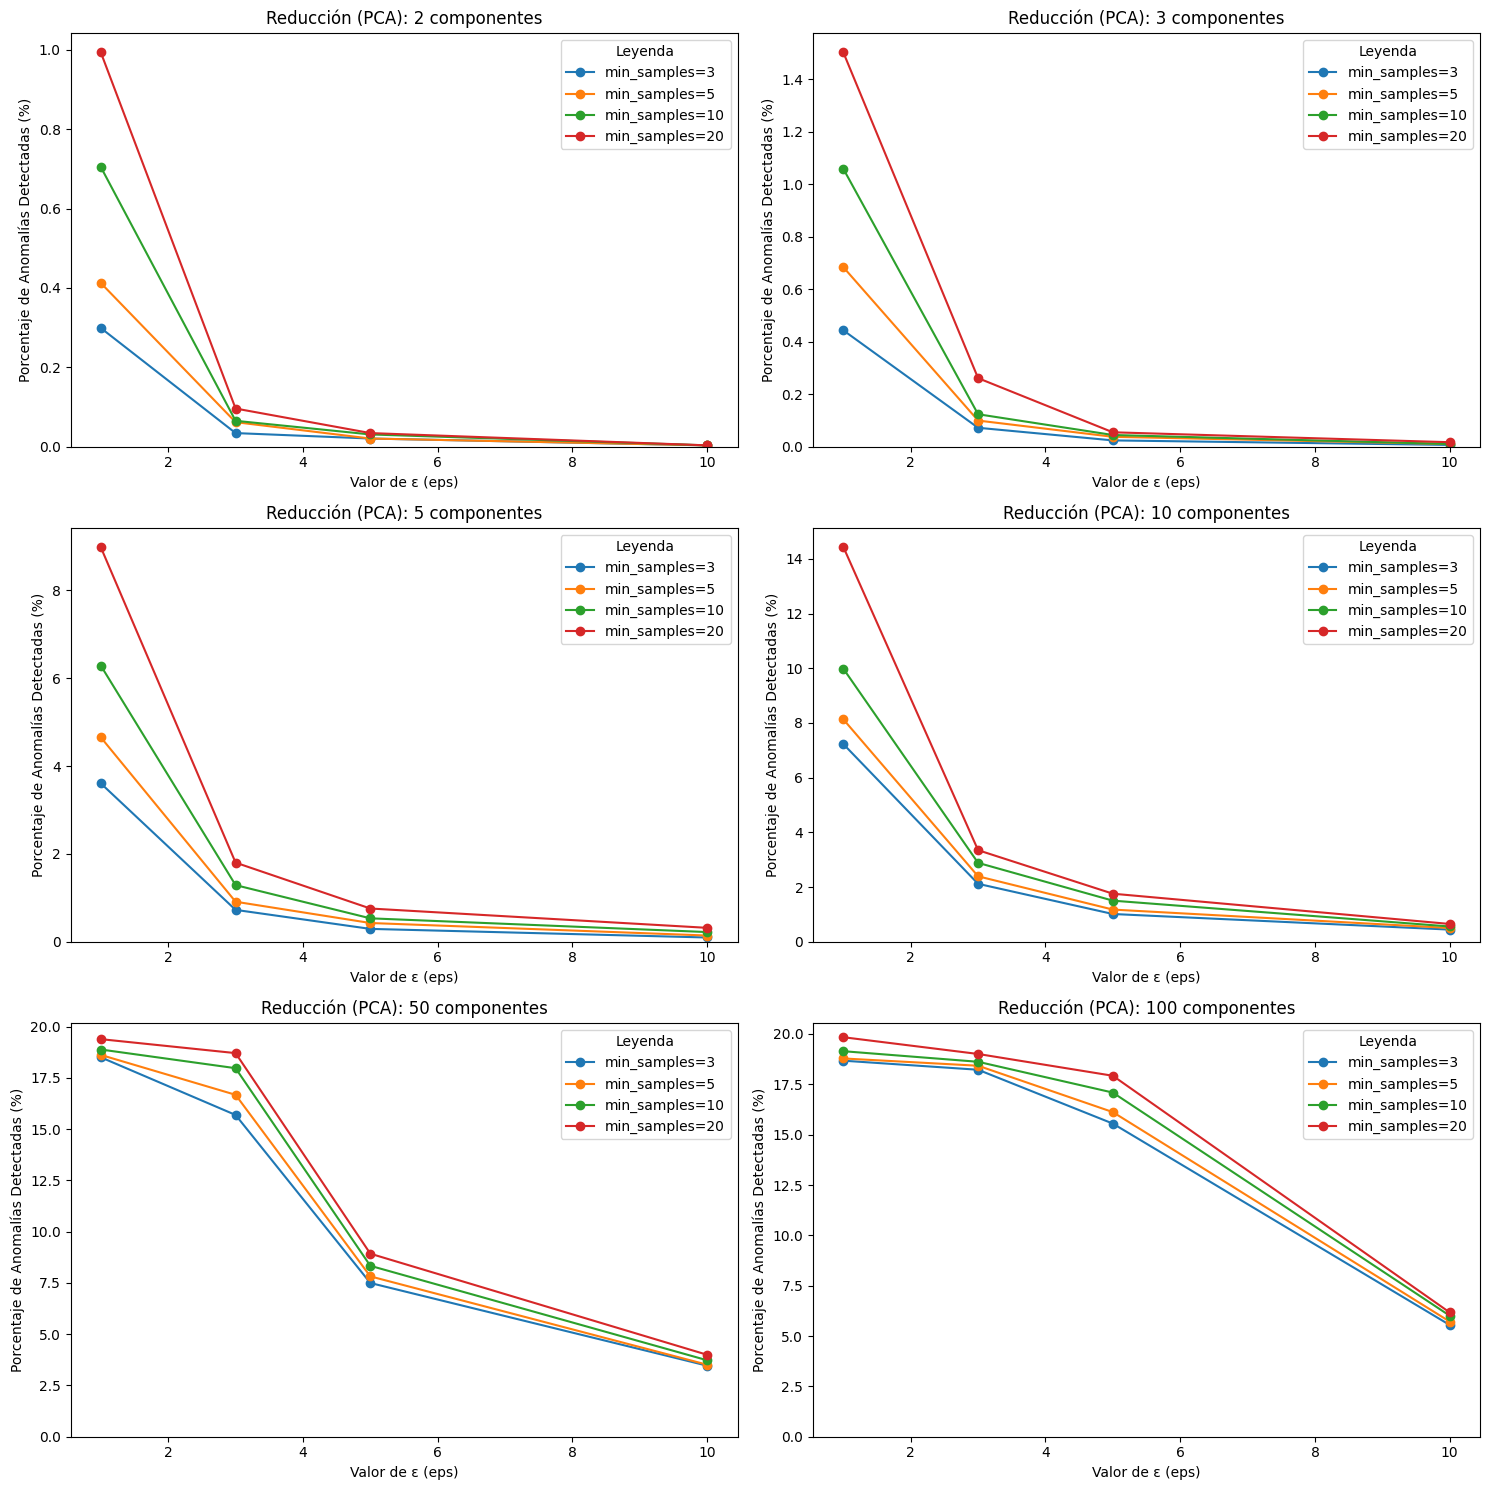

In [13]:

# Obtener los valores únicos de 'Reducción (PCA)'
pca_reductions = results_df['Reducción (PCA)'].unique()

# Configurar la figura con subplots
num_plots = len(pca_reductions)
num_cols = 2  # Dos columnas por fila
num_rows = int(np.ceil(num_plots / num_cols))

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Aplanar la matriz de ejes para facilitar el acceso

# Iterar sobre cada valor de 'Reducción (PCA)'
for i, reduction in enumerate(pca_reductions):
    ax = axes[i]  # Seleccionar el subplot correspondiente
    
    # Filtrar los datos para el valor actual de 'Reducción (PCA)'
    filtered_data = results_df[results_df['Reducción (PCA)'] == reduction]
    
    # Agrupar por 'eps' y 'min_samples' y calcular el porcentaje de anomalías detectadas
    grouped_data = filtered_data.groupby(['eps', 'min_samples'])['Porcentaje de Anomalías'].mean().reset_index()
    
    # Crear un gráfico para cada valor de 'min_samples'
    for min_samples, group in grouped_data.groupby('min_samples'):
        ax.plot(group['eps'], group['Porcentaje de Anomalías'], marker='o', label=f'min_samples={min_samples}')
    
    # Configurar título y etiquetas
    ax.set_title(f'Reducción (PCA): {reduction} componentes')
    ax.set_xlabel('Valor de ε (eps)')
    ax.set_ylabel('Porcentaje de Anomalías Detectadas (%)')
    ax.legend(title='Leyenda', loc='best')  # Agregar leyenda
    
    # Ajustar límites del eje y si es necesario
    ax.set_ylim(bottom=0)  # Asegurarse de que el eje y comience en 0

# Ocultar subplots vacíos si hay menos subplots que el número máximo posible
for j in range(num_plots, len(axes)):
    fig.delaxes(axes[j])

# Ajustar el diseño para evitar solapamientos
plt.tight_layout()
plt.savefig(f"dbscan_porcentaje-Anomalias.png")
plt.show()